In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

c:\users\heythere\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
tf.reset_default_graph() 

In [5]:
# DEFINE parameters
num_inputs = 784 # 28*28
neurons_hid1 = 392
neurons_hid2 = 196
neurons_hid3 = 98
neurons_hid4 = 49
neurons_hid5 = 25
neurons_hid6 = 12
neurons_hid7 = 6
neurons_hid8 = 3
neurons_hid9 = 2
neurons_hid10 = 1

learning_rate = 0.0003

In [6]:
# PINV(PSEUDO-INVERSE) function
def pinv(a, rcond=1e-15):
    s, u, v = tf.svd(a)
    # Ignore singular values close to zero to prevent numerical overflow
    limit = rcond * tf.reduce_max(s)
    non_zero = tf.greater(s, limit)

    reciprocal = tf.where(non_zero, tf.reciprocal(s), tf.zeros(s.shape))
    lhs = tf.matmul(v, tf.diag(reciprocal))
    return tf.matmul(lhs, u, transpose_b=True)

In [7]:
## PLACEHOLDER DEFINATION
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

In [8]:
# TRANSPOSE OR PINV
tie_weight = tf.transpose #pinv

In [9]:
## WEIGHTS DEFINATION
initializer = tf.variance_scaling_initializer()

w1 = tf.Variable(initializer([num_inputs,neurons_hid1]), dtype=tf.float32)
w1_ = tie_weight(w1)
b1 = tf.Variable(tf.zeros([neurons_hid1]))

In [10]:
# ACTIVATION FUNCTION  [ lambda X:X  <OR>  tf.nn.relu  ]
# act_func = lambda X:X
act_func = tf.nn.tanh

In [11]:
# LAYER MODELING OF :NN
hid_layer1 = act_func(tf.matmul(X, w1)+b1)
output_layer = tf.matmul(hid_layer1, w1_)

In [12]:
# LOSS FUNCTIONS
loss = tf.reduce_mean(tf.square(output_layer - X))
# loss = tf.reduce_mean(tf.abs(output_layer - X))
# cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y,logits=yout))

In [13]:
# TRAINING
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss, var_list=[w1, b1])

In [14]:
# PREPARATION
init = tf.global_variables_initializer()
saver = tf.train.Saver() 

In [15]:
num_epochs = 100
batch_size = 150

try:
    with tf.Session() as sess:
        sess.run(init)

        # Epoch == Entire Training Set
        for epoch in range(num_epochs):
            num_batches = mnist.train.num_examples // batch_size

            # 150 batch size
            for iteration in range(num_batches):
                X_batch, y_batch = mnist.train.next_batch(batch_size)
                sess.run(train, feed_dict={X: X_batch})

            training_loss = loss.eval(feed_dict={X: X_batch})   
            print("Epoch {} Complete. Training Loss: {}".format(epoch,training_loss))
            saver.save(sess, "./save/ae_1_392.ckpt")      
except KeyboardInterrupt:
    print('Keyboard Interrupted')
finally:
    print('Finished Training the Model')

Epoch 0 Complete. Training Loss: 0.005360935814678669
Epoch 1 Complete. Training Loss: 0.0030584665946662426
Epoch 2 Complete. Training Loss: 0.002417005831375718
Epoch 3 Complete. Training Loss: 0.0019118697382509708
Epoch 4 Complete. Training Loss: 0.001682025264017284
Epoch 5 Complete. Training Loss: 0.001590836327522993
Epoch 6 Complete. Training Loss: 0.001370427431538701
Epoch 7 Complete. Training Loss: 0.001343677518889308
Epoch 8 Complete. Training Loss: 0.001136076170951128
Epoch 9 Complete. Training Loss: 0.0011517523089423776
Epoch 10 Complete. Training Loss: 0.0010803021723404527
Epoch 11 Complete. Training Loss: 0.0009061775635927916
Epoch 12 Complete. Training Loss: 0.0008644454064778984
Epoch 13 Complete. Training Loss: 0.0008594426908530295
Epoch 14 Complete. Training Loss: 0.0008883327827788889
Epoch 15 Complete. Training Loss: 0.0007543739047832787
Epoch 16 Complete. Training Loss: 0.00080120685743168
Epoch 17 Complete. Training Loss: 0.0008367518894374371
Epoch 18 Co

In [16]:
num_test_images = 10
start_point = 15
with tf.Session() as sess:
    
    saver.restore(sess,"./save/ae_1_392.ckpt")
    
    results,compressed = sess.run([output_layer, hid_layer1],
                                  feed_dict={X:mnist.test.images[start_point:num_test_images+start_point]})
    weight1 = w1.eval()
    biases1 = b1.eval()

INFO:tensorflow:Restoring parameters from ./save/ae_1_392.ckpt


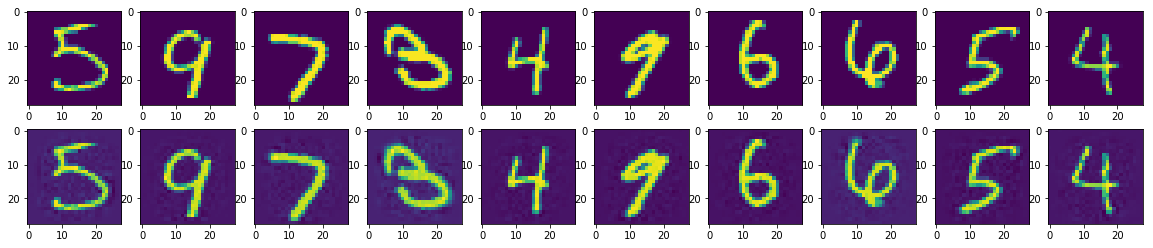

In [17]:
# ORIGINAL VS RECONSTRUCTED
f, a = plt.subplots(2, num_test_images, figsize=(20, 4))
for i in range(start_point,num_test_images+start_point):
    j = i-start_point
    a[0][j].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][j].imshow(np.reshape(results[j], (28, 28)))

In [22]:
np.set_printoptions(precision=3, suppress=True)
print(biases1)

[-0.464 -0.35   0.4    0.596  0.34  -0.182 -0.038  0.051 -0.089 -0.239
  0.063 -0.116  0.341  0.192 -0.131 -0.022  0.061  0.17  -0.14   0.603
 -0.035  0.175 -0.019  0.09  -0.493 -0.41   0.553  0.376  0.101 -0.276
  0.179  0.242  0.198  0.216 -0.363 -0.267  0.137  0.568  0.032  0.203
 -0.187 -0.643 -0.607  0.547 -0.066  0.039 -0.537  0.167 -0.059 -0.103
 -0.313  0.363  0.416 -0.001  0.224 -0.566  0.006  0.575 -0.216 -0.226
 -0.564 -0.163 -0.553 -0.53  -0.467  0.551 -0.124 -0.086  0.053  0.322
 -0.274 -0.112 -0.102  0.558  0.113 -0.343  0.217  0.457 -0.193  0.306
 -0.591  0.139 -0.224 -0.162  0.594 -0.313  0.653 -0.603 -0.396  0.611
 -0.11   0.455  0.553 -0.108  0.164 -0.579  0.619  0.346 -0.226  0.055
 -0.579  0.114  0.224  0.062  0.537  0.126  0.216  0.162 -0.605 -0.598
  0.156  0.186  0.14   0.416 -0.006 -0.04   0.564 -0.119 -0.385  0.121
  0.126  0.207 -0.588  0.011 -0.196 -0.283  0.506 -0.228 -0.17   0.115
 -0.    -0.582 -0.607  0.518 -0.284 -0.122  0.587  0.078  0.094  0.553
 -0.37

In [28]:
# np.save('./save/weights/w1.npy',weight1)
#wt1 = np.load('./save/weights/w1.npy')